

<h1 align="center"><font size="5">Classification with Python</font></h1>


In [33]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [34]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2021-07-17 18:14:49--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0s      

2021-07-17 18:14:49 (191 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File


In [35]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [36]:
df.shape

(346, 10)

In [37]:
df.count()

Unnamed: 0        346
Unnamed: 0.1      346
loan_status       346
Principal         346
terms             346
effective_date    346
due_date          346
age               346
education         346
Gender            346
dtype: int64

In [38]:
df.isnull().sum()

Unnamed: 0        0
Unnamed: 0.1      0
loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
age               0
education         0
Gender            0
dtype: int64

In [39]:
df.dtypes

Unnamed: 0         int64
Unnamed: 0.1       int64
loan_status       object
Principal          int64
terms              int64
effective_date    object
due_date          object
age                int64
education         object
Gender            object
dtype: object

### Convert to date time object


In [40]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [41]:
df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1, inplace = True)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [42]:
df.dtypes

loan_status               object
Principal                  int64
terms                      int64
effective_date    datetime64[ns]
due_date          datetime64[ns]
age                        int64
education                 object
Gender                    object
dtype: object

# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [43]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [ ]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

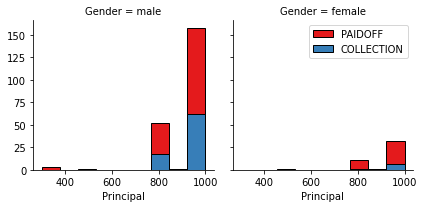

In [44]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

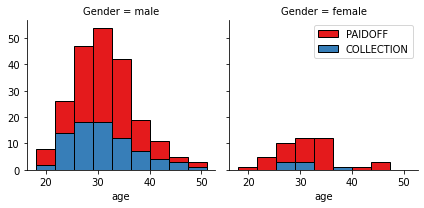

In [45]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


In [1]:
# df['dayofweek'] = df['effective_date'].dt.dayofweek
# bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
# g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
# g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
# g.axes[-1].legend()
# plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [47]:
# df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
# df.head()
df['dayofweek_getloan'] = df['effective_date'].dt.dayofweek
df['dayofweek_dueloan'] = df['due_date'].dt.dayofweek
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,dayofweek_getloan,dayofweek_dueloan
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,3,4
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,3,4
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,3,3
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,4,5
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,4,5


In [53]:
df.drop(['dayofweek'], axis = 1, inplace = True)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek_getloan,dayofweek_dueloan
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,4
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,4
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,3
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,5
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,5


In [49]:
# df.drop(['dayofweek', 'weekend'], axis = 1, inplace = True)
# df.head()

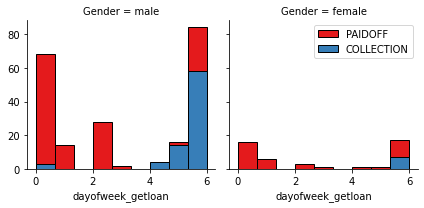

In [54]:
bins = np.linspace(df.dayofweek_getloan.min(), df.dayofweek_getloan.max(), 10)
g = sns.FacetGrid(df, col = "Gender", hue="loan_status", palette="Set1", col_wrap = 2)
g.map(plt.hist, 'dayofweek_getloan', bins = bins, ec = "k")
g.axes[-1].legend()
plt.show()

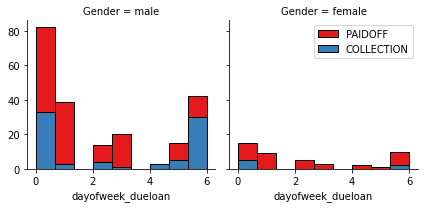

In [55]:
bins = np.linspace(df.dayofweek_dueloan.min(), df.dayofweek_dueloan.max(), 10)
g = sns.FacetGrid(df, col = "Gender", hue="loan_status", palette="Set1", col_wrap = 2)
g.map(plt.hist, 'dayofweek_dueloan', bins = bins, ec = "k")
g.axes[-1].legend()
plt.show()

In [58]:
#encode effective_date weekend
df['weekend_getloan'] = df['dayofweek_getloan'].apply(lambda x: 1 if (x > 3)  else 0)

#encode monday and sunday of due_date
df['startendweek_dueloan'] = df['dayofweek_dueloan'].apply(lambda x: 1 if (x == 0 or x == 6)  else 0)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek_getloan,dayofweek_dueloan,weekend_getloan,startendweek_dueloan
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,4,0,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,4,0,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,3,0,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,5,1,0
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,5,1,0


In [60]:
#encode gender
gender_dummy = pd.get_dummies(df.Gender)

#encode education
edu_dummy = pd.get_dummies(df.education)

#combined all new encoded features to dataframe
df = pd.concat([df, gender_dummy, edu_dummy], axis = 1)

df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek_getloan,dayofweek_dueloan,weekend_getloan,startendweek_dueloan,female,male,Bechalor,High School or Below,Master or Above,college
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,4,0,0,0,1,0,1,0,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,4,0,0,1,0,1,0,0,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,3,0,0,0,1,0,0,0,1
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,5,1,0,1,0,0,0,0,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,5,1,0,0,1,0,0,0,1


In [61]:
#encode loan_status
df['loan_stat'] = df['loan_status'].apply(lambda x: 1 if (x == 'PAIDOFF')  else 0)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek_getloan,dayofweek_dueloan,weekend_getloan,startendweek_dueloan,female,male,Bechalor,High School or Below,Master or Above,college,loan_stat
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,4,0,0,0,1,0,1,0,0,1
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,4,0,0,1,0,1,0,0,0,1
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,3,0,0,0,1,0,0,0,1,1
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,5,1,0,1,0,0,0,0,1,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,5,1,0,0,1,0,0,0,1,1


In [63]:
#remove unused column.
df.drop(['loan_status','effective_date', 'due_date', 'dayofweek_getloan', 'dayofweek_dueloan', 'education','Gender'], axis = 1, inplace = True)

df.head()

,Principal,terms,age,weekend_getloan,startendweek_dueloan,female,male,Bechalor,High School or Below,Master or Above,college,loan_stat
0,1000,30,45,0,0,0,1,0,1,0,0,1
1,1000,30,33,0,0,1,0,1,0,0,0,1
2,1000,15,27,0,0,0,1,0,0,0,1,1
3,1000,30,28,1,0,1,0,0,0,0,1,1
4,1000,30,29,1,0,0,1,0,0,0,1,1


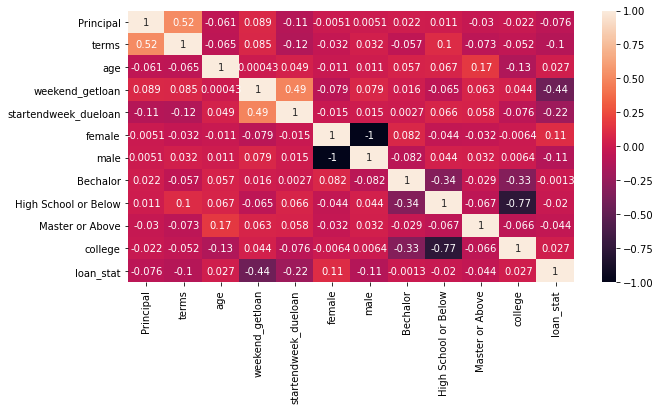

In [64]:
plt.figure(figsize=(10, 5))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

## Convert Categorical features to numerical values


Let's look at gender:


In [65]:
# df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [30]:
# df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
# df.head()

## One Hot Encoding

#### How about education?


In [66]:
# df.groupby(['education'])['loan_status'].value_counts(normalize=True)

#### Features before One Hot Encoding


In [67]:
# df[['Principal','terms','age','Gender','education']].head()

#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [68]:
# Feature = df[['Principal','terms','age','Gender','weekend']]
# Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
# Feature.drop(['Master or Above'], axis = 1,inplace=True)
# Feature.head()


### Feature Selection


Let's define feature sets, X:


In [69]:
# X = Feature
# X[0:5]
x = df.iloc[:,:-1].values
x

array([[1000,   30,   45, ...,    1,    0,    0],
       [1000,   30,   33, ...,    0,    0,    0],
       [1000,   15,   27, ...,    0,    0,    1],
       ...,
       [ 800,   15,   39, ...,    0,    0,    1],
       [1000,   30,   28, ...,    0,    0,    1],
       [1000,   30,   26, ...,    0,    0,    1]])

What are our lables?


In [72]:
y = df['loan_stat'].values
y[0:5]

array([1, 1, 1, 1, 1])

In [73]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.3, random_state = 10)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Validation set:', x_val.shape,  y_val.shape)

Train set: (242, 11) (242,)
Validation set: (104, 11) (104,)


## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [75]:
# X= preprocessing.StandardScaler().fit(X).transform(X)
sc = preprocessing.StandardScaler()
x_train = sc.fit_transform(x_train)
x_val = sc.transform(x_val)
x_train[0:5]

array([[ 0.51622071, -0.95747848, -0.48959671,  0.76948376,  0.73579975,
        -0.40430377,  0.40430377, -0.36898541,  1.1815412 , -0.09128709,
        -0.91287093],
       [ 0.51622071, -1.95300927,  0.00683794,  0.76948376, -1.35906542,
        -0.40430377,  0.40430377,  2.71013424, -0.84635221, -0.09128709,
        -0.91287093],
       [ 0.51622071,  0.90914175,  0.17231616, -1.29957258, -1.35906542,
        -0.40430377,  0.40430377, -0.36898541, -0.84635221, -0.09128709,
         1.09544512],
       [ 0.51622071,  0.90914175,  1.16518547,  0.76948376,  0.73579975,
         2.47338777, -2.47338777, -0.36898541, -0.84635221, -0.09128709,
         1.09544512],
       [ 0.51622071,  0.90914175, -0.98603137,  0.76948376,  0.73579975,
        -0.40430377,  0.40430377, -0.36898541,  1.1815412 , -0.09128709,
        -0.91287093]])

In [77]:
x_val

array([[ 0.51622071,  0.90914175, -1.48246603, ...,  1.1815412 ,
        -0.09128709, -0.91287093],
       [-1.29429251, -0.95747848,  1.99257657, ...,  1.1815412 ,
        -0.09128709, -0.91287093],
       [-1.29429251, -0.95747848,  0.83422904, ..., -0.84635221,
        -0.09128709,  1.09544512],
       ...,
       [ 0.51622071,  0.90914175, -0.15864028, ..., -0.84635221,
        -0.09128709,  1.09544512],
       [ 0.51622071, -0.95747848,  0.17231616, ...,  1.1815412 ,
        -0.09128709, -0.91287093],
       [ 0.51622071,  0.90914175, -1.97890068, ...,  1.1815412 ,
        -0.09128709, -0.91287093]])

# Classification




*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression




# K Nearest Neighbor(KNN)




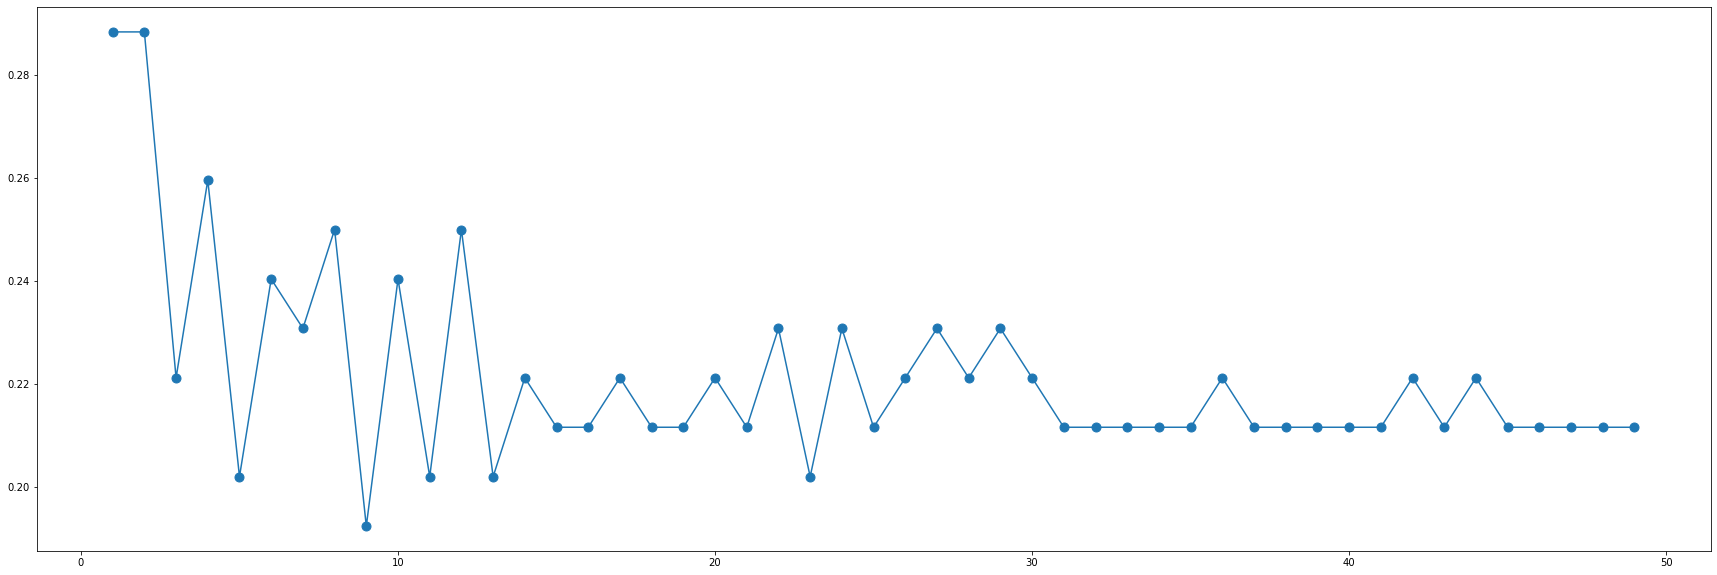

In [88]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

error_rate = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_val)
    error_rate.append(np.mean(pred != y_val))

plt.figure(figsize=(30,10))
plt.plot(range(1,50),error_rate, marker='o', markersize=9)

### we can see that from K =15 the graph is alsmost flat . So according to elbow method , i'm taking k = 15 .

In [99]:
classifier_knn = KNeighborsClassifier(n_neighbors=15, p=2, metric='euclidean')
classifier_knn.fit(x_train, y_train)
y_pred_knn = classifier_knn.predict(x_val)

In [100]:
print(accuracy_score(y_val, y_pred_knn))
print(confusion_matrix(y_val, y_pred_knn))
print(classification_report(y_val, y_pred_knn))
print(f1_score(y_val, y_pred_knn))

0.7884615384615384
[[ 2 20]
 [ 2 80]]
              precision    recall  f1-score   support

           0       0.50      0.09      0.15        22
           1       0.80      0.98      0.88        82

    accuracy                           0.79       104
   macro avg       0.65      0.53      0.52       104
weighted avg       0.74      0.79      0.73       104

0.8791208791208791


# Decision Tree


In [136]:
from sklearn.tree import DecisionTreeClassifier

classifierDT = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
classifierDT.fit(x_train, y_train)

y_pred = classifierDT.predict(x_val)

In [137]:
print(accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))

0.6730769230769231
[[ 9 13]
 [21 61]]


In [138]:
print(classification_report(y_val, y_pred))
print(f1_score(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.30      0.41      0.35        22
           1       0.82      0.74      0.78        82

    accuracy                           0.67       104
   macro avg       0.56      0.58      0.56       104
weighted avg       0.71      0.67      0.69       104

0.7820512820512819


# Support Vector Machine


In [84]:
from sklearn.svm import SVC
classifier_svm = SVC(kernel = 'rbf', random_state = 0)
classifier_svm.fit(x_train, y_train)

y_pred = classifier_svm.predict(x_val)

In [85]:
print(accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))

0.7884615384615384
[[ 0 22]
 [ 0 82]]


In [86]:
print(classification_report(y_val, y_pred))
print(f1_score(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.79      1.00      0.88        82

    accuracy                           0.79       104
   macro avg       0.39      0.50      0.44       104
weighted avg       0.62      0.79      0.70       104

0.8817204301075269


/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Logistic Regression


In [114]:
from sklearn.linear_model import LogisticRegression

classifierLR = LogisticRegression(solver = 'liblinear', random_state = 0)
classifierLR.fit(x_train, y_train)

y_pred = classifierLR.predict(x_val)

In [115]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

print(accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))


0.8076923076923077
[[ 5 17]
 [ 3 79]]


In [116]:
print(classification_report(y_val, y_pred))
print(f1_score(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.23      0.33        22
           1       0.82      0.96      0.89        82

    accuracy                           0.81       104
   macro avg       0.72      0.60      0.61       104
weighted avg       0.78      0.81      0.77       104

0.8876404494382022


# Model Evaluation using Test set


In [124]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


First, download and load the test set:


In [102]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2021-07-17 19:02:55--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2021-07-17 19:02:55 (83.9 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation


In [103]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [110]:
test_df.shape

(54, 12)

In [105]:
# Drop Insignificant Column
test_df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1, inplace = True)

#Renaming Column
test_df.rename(columns={'Principal': 'principal', "Gender": "gender"}, inplace = True)

# Standardizing Text & Fixing Typos
test_df['loan_status'] = test_df['loan_status'].apply(lambda x: 'paid_off' if (x == 'PAIDOFF')  else 'defaulted')

test_df.loc[test_df.education == 'High School or Below', 'education'] = 'high_school_or_below'
test_df.loc[test_df.education == 'college', 'education'] = 'college'
test_df.loc[test_df.education == 'Bechalor', 'education'] = 'bachelor'
test_df.loc[test_df.education == 'Master or Above', 'education'] = 'master_or_above'

# Convert to date time object
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])

test_df['dayofweek_getloan'] = test_df['effective_date'].dt.dayofweek
test_df['dayofweek_dueloan'] = test_df['due_date'].dt.dayofweek

#encode effective_date weekend
test_df['weekend_getloan'] = test_df['dayofweek_getloan'].apply(lambda x: 1 if (x > 3)  else 0)

#encode monday and sunday of due_date
test_df['startendweek_dueloan'] = test_df['dayofweek_dueloan'].apply(lambda x: 1 if (x == 0 or x == 6)  else 0)

#encode gender
gender_dummy = pd.get_dummies(test_df.gender)

#encode education
edu_dummy = pd.get_dummies(test_df.education)

#combined all new encoded features to dataframe
test_df = pd.concat([test_df, gender_dummy, edu_dummy], axis = 1)

#encode loan_status
test_df['loan_stat'] = test_df['loan_status'].apply(lambda x: 1 if (x == 'paid_off')  else 0)

#remove unused column.
test_df.drop(['loan_status','effective_date', 'due_date', 'dayofweek_getloan', 'dayofweek_dueloan', 'education','gender'], axis = 1, inplace = True)

test_df.head()

,principal,terms,age,weekend_getloan,startendweek_dueloan,female,male,bachelor,college,high_school_or_below,master_or_above,loan_stat
0,1000,30,50,0,0,1,0,1,0,0,0,1
1,300,7,35,1,0,0,1,0,0,0,1,1
2,1000,30,43,1,1,1,0,0,0,1,0,1
3,1000,30,26,1,1,0,1,0,1,0,0,1
4,800,15,29,1,1,0,1,1,0,0,0,1


In [109]:
x_test = test_df.iloc[:,:-1].values
y_test = test_df.iloc[:,-1].values
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### K Nearest Neighbor(KNN) test data evaluation

In [134]:
y_pred = classifier_knn.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.7407407407407407
[[ 0 14]
 [ 0 40]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.74      1.00      0.85        40

    accuracy                           0.74        54
   macro avg       0.37      0.50      0.43        54
weighted avg       0.55      0.74      0.63        54



/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [135]:
print("KNN Jaccard index: %.2f" % jaccard_score(y_test, y_pred))
print("KNN F1-score: %.2f" % f1_score(y_test, y_pred) )

KNN Jaccard index: 0.74
KNN F1-score: 0.85


### Decision Tree test data evaluation

In [132]:
y_pred = classifierDT.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.46296296296296297
[[ 4 10]
 [19 21]]
              precision    recall  f1-score   support

           0       0.17      0.29      0.22        14
           1       0.68      0.53      0.59        40

    accuracy                           0.46        54
   macro avg       0.43      0.41      0.40        54
weighted avg       0.55      0.46      0.49        54

0.5915492957746479


In [133]:
print("Decision Tree Jaccard index: %.2f" % jaccard_score(y_test, y_pred))
print("Decision Tree F1-score: %.2f" % f1_score(y_test, y_pred) )

Decision Tree Jaccard index: 0.42
Decision Tree F1-score: 0.59


### SVM test data evaluation

In [129]:
y_pred = classifier_svm.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.7407407407407407
[[ 0 14]
 [ 0 40]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.74      1.00      0.85        40

    accuracy                           0.74        54
   macro avg       0.37      0.50      0.43        54
weighted avg       0.55      0.74      0.63        54



/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [130]:
print("SVM Jaccard index: %.2f" % jaccard_score(y_test, y_pred))
print("SVM F1-score: %.2f" % f1_score(y_test, y_pred) )

SVM Jaccard index: 0.74
SVM F1-score: 0.85


### Logistic Regression test data evaluation

In [122]:
y_pred = classifierLR.predict(x_test)
y_pred_prob = classifierLR.predict_proba(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.7407407407407407
[[ 0 14]
 [ 0 40]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.74      1.00      0.85        40

    accuracy                           0.74        54
   macro avg       0.37      0.50      0.43        54
weighted avg       0.55      0.74      0.63        54



/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [127]:
print("LR Jaccard index: %.2f" % jaccard_score(y_test, y_pred))
print("LR F1-score: %.2f" % f1_score(y_test, y_pred) )
print("LR LogLoss: %.2f" % log_loss(y_test, y_pred_prob))

LR Jaccard index: 0.74
LR F1-score: 0.85
LR LogLoss: 8.95


# Report
 the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 0.74       | 0.85        | NA      |
| Decision Tree      | 0.42       | 0.59        | NA      |
| SVM                | 0.74       | 0.85        | NA      |
| LogisticRegression | 0.74       | 0.85        | 8.95       |
